In [44]:
import os
import numpy as np  
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential

In [3]:
DATA_DIR = 'E:/Data/dataset/PetImages'  # Dossier parent avec dog/ et cat/
IMG_SIZE = (150, 150)                # Taille des images
BATCH_SIZE = 32                      # Taille des batches
VAL_SPLIT = 0.3                      # 30% pour la validation
SEED = 42                          # Pour la reproductibilité

In [4]:
dog_dir = os.path.join(DATA_DIR, 'dog')
cat_dir = os.path.join(DATA_DIR, 'cat')
dog_images = [f for f in os.listdir(dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
cat_images = [f for f in os.listdir(cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    

In [5]:
print(f"Nombre d'images de chiens: {len(dog_images)}")
print(f"Nombre d'images de chats: {len(cat_images)}")

Nombre d'images de chiens: 12499
Nombre d'images de chats: 12499


In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,           # Normalisation [0,1]
        rotation_range=20,        # Rotation aléatoire
        width_shift_range=0.1,    # Déplacement horizontal
        height_shift_range=0.1,   # Déplacement vertical
        shear_range=0.1,          # Cisaillement
        zoom_range=0.1,           # Zoom aléatoire
        horizontal_flip=True,     # Retournement horizontal
        brightness_range=[0.9, 1.1], # Variation de luminosité
        fill_mode='nearest',      # Remplissage des bords
        validation_split=VAL_SPLIT  # Split pour validation
    )
    
# Préprocessing pour la validation (sans augmentation)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VAL_SPLIT
)

# Générateur d'entraînement
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',      # binary pour 2 classes
    shuffle=True,
    seed=SEED,
    color_mode='rgb',         # Images couleur
    subset='training'         # Sous-ensemble d'entraînement
)

# Générateur de validation
validation_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,           # Pas de shuffle pour la validation
    color_mode='rgb',
    subset='validation'      # Sous-ensemble de validation
)

Found 17500 images belonging to 2 classes.
Found 7498 images belonging to 2 classes.


In [11]:
modele = Sequential()

# Premiere couche de convolution
modele.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

# Couche de pooling
modele.add(MaxPooling2D(pool_size=(2,2)))

# Regularisation
modele.add(Dropout(0.5))

# Deuxieme couche de convolution
modele.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

# Couche de pooling
modele.add(MaxPooling2D(pool_size=(2,2)))

# Regularisation
modele.add(Dropout(0.5))

# Couche de flattening
modele.add(Flatten())

# Couche dense
modele.add(Dense(32,activation='relu'))

# Couche de sortie
modele.add(Dense(1,activation='sigmoid'))

modele.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

print(modele.summary())


e:\Data\script\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     2,654,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,993 (10.27 MB)

 Trainable params: 2,692,993 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
import os
from PIL import Image

for folder in ["cat", "dog"]:
    folder_path = os.path.join(DATA_DIR, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # vérifie l'image
        except Exception as e:
            print("Image supprimée :", file_path)
            os.remove(file_path)


Image supprimée : E:/Data/dataset/PetImages\cat\Thumbs.db


e:\Data\script\venv\lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Image supprimée : E:/Data/dataset/PetImages\dog\Thumbs.db


In [15]:

for folder in ["cat", "dog"]:
    path = os.path.join(DATA_DIR, folder)
    print(folder, ":", len(os.listdir(path)), "images")

cat : 12499 images
dog : 12499 images


In [16]:
modele.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.6257 - loss: 0.6447 - val_accuracy: 0.6774 - val_loss: 0.6168
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.6576 - loss: 0.6151 - val_accuracy: 0.6863 - val_loss: 0.6020
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 22727s 42s/step - accuracy: 0.6753 - loss: 0.5980 - val_accuracy: 0.7217 - val_loss: 0.5522
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.6989 - loss: 0.5703 - val_accuracy: 0.7391 - val_loss: 0.5405
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.7198 - loss: 0.5490 - val_accuracy: 0.7642 - val_loss: 0.4937
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 623s 1s/step - accuracy: 0.7383 - loss: 0.5288 - val_accuracy: 0.7698 - val_loss: 0.4860
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.7467 - loss: 0.5139 - val_accuracy: 0.7754 - val_loss: 0.4867
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 709s 1s/step - accuracy: 0.7527 - loss: 0.5048 - val_a

In [83]:
prediction = modele.predict(validation_generator)

235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 243ms/step


In [18]:
prediction

array([[0.18591711],
       [0.00496064],
       [0.14816047],
       ...,
       [0.9998059 ],
       [0.9841796 ],
       [0.2531525 ]], shape=(7498, 1), dtype=float32)

In [19]:
images, labels = next(validation_generator)

In [21]:
import matplotlib.pyplot as plt

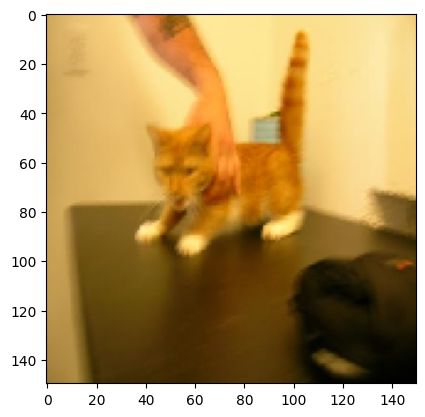

In [22]:
plt.imshow(images[0])
plt.show()

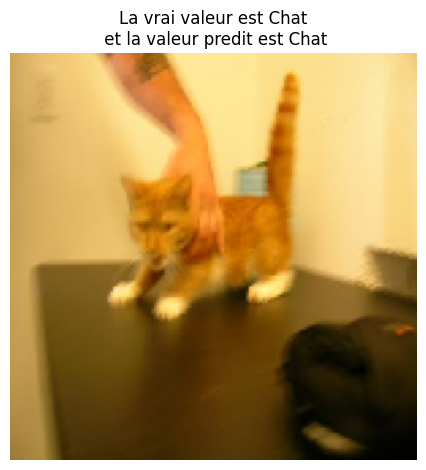

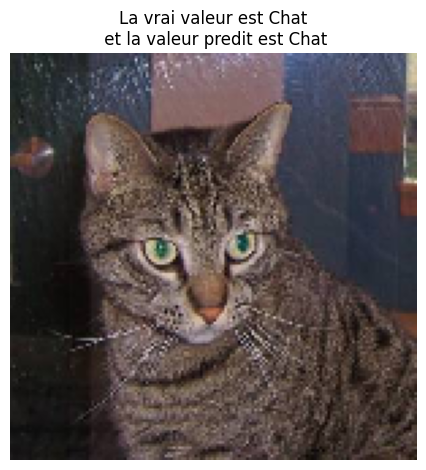

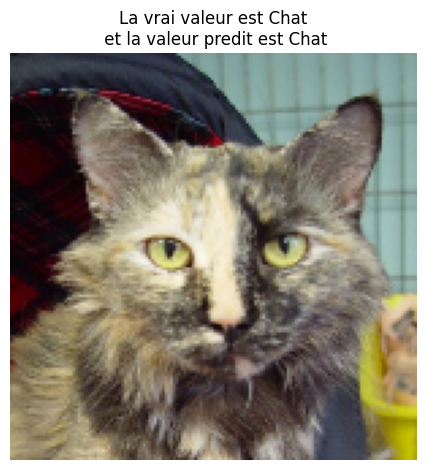

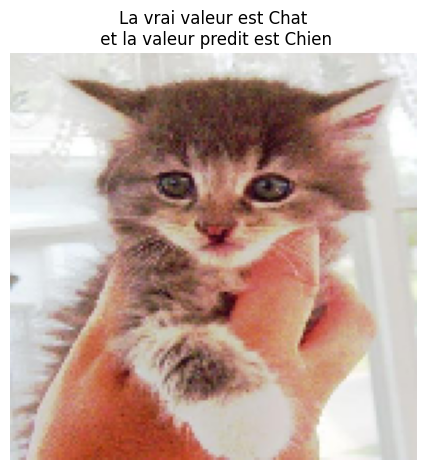

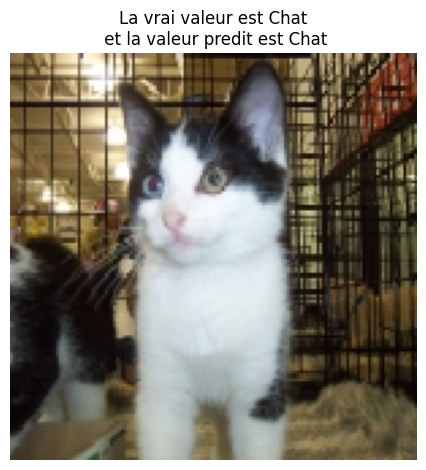

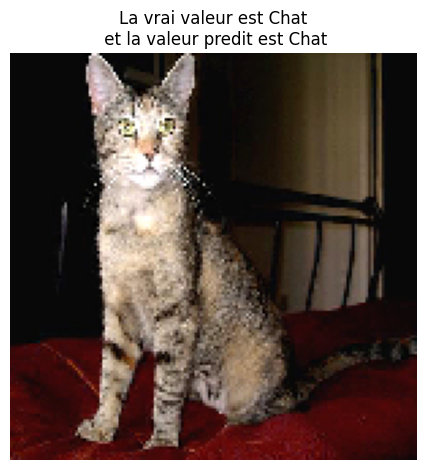

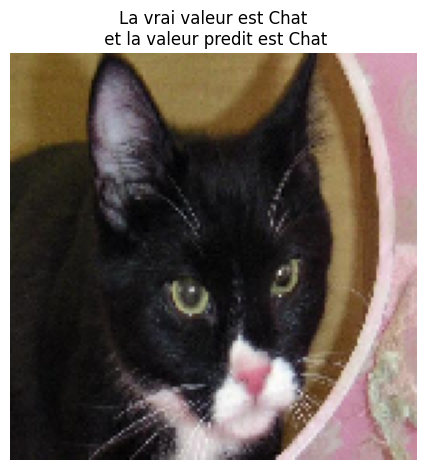

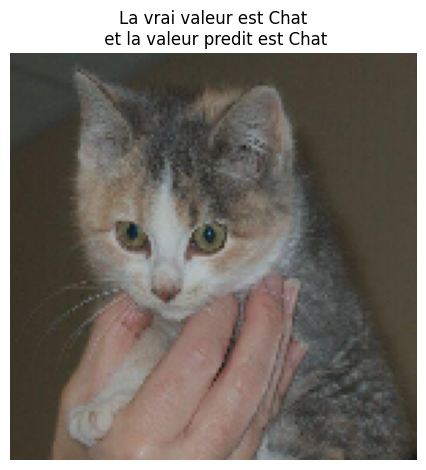

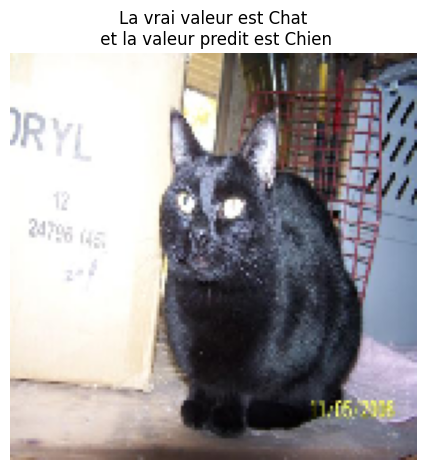

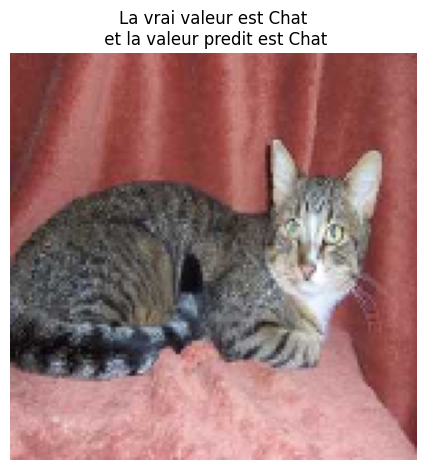

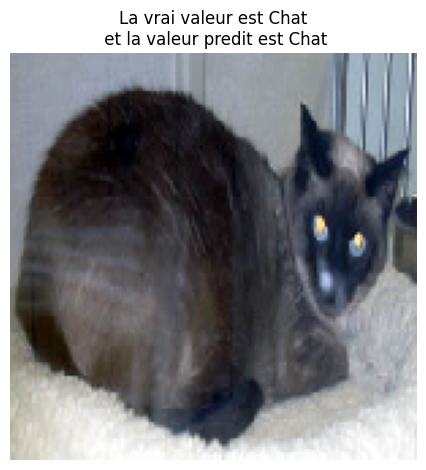

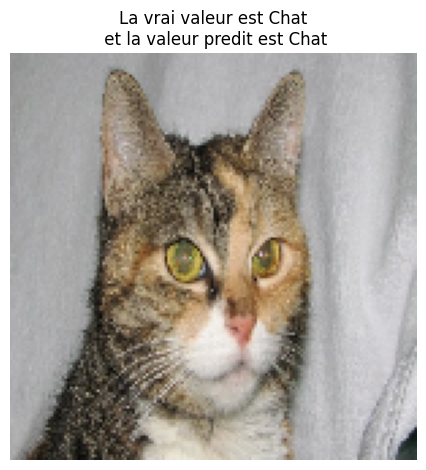

In [25]:
for i in range(min(12, len(images))):
    
    plt.imshow(images[i])
    class_name = 'Chien' if labels[i] > 0.5 else 'Chat'
    predict = 'Chien' if prediction[i] > 0.5 else 'Chat'
    plt.title(f'La vrai valeur est {class_name}\n et la valeur predit est {predict}')
    plt.axis('off')


    plt.tight_layout()
    plt.show()

## Score

In [26]:
len(prediction),len(labels)

(7498, 32)

In [28]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
all_labels = []
image_vis = []

for i in range(len(validation_generator)):
    image,label = next(validation_generator)
    all_labels = all_labels + list(label)
    image_vis.append(image)

print(len(all_labels))  # Devrait être égal au nombre total d'images de validation

7498


In [38]:
np.unique(np.array(all_labels), return_counts=True)

(array([0., 1.], dtype=float32), array([3749, 3749]))

In [103]:
true = 0
false = 0
false_images = [] # (batch, index)
prediction = [1 if p > 0.5 else 0 for p in prediction]
index = -1

batch_image = 0
for i,j in zip(all_labels,prediction):
    if index == 32:
        batch_image += 1
        index = -1
    index += 1
    if i == j:
        true += 1
    else:
        false += 1
        false_images.append((batch_image, index))


print(true,false)
print(true/(true+false))  # Accuracy

5901 1597
0.7870098692984796


In [100]:
image[0].shape

(150, 150, 3)

In [101]:
image_vis[0][0].shape

(150, 150, 3)

In [80]:
def image_visualisation(im_dir):
    img = keras_image.load_img(im_dir, target_size=(150,150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()  

In [70]:
def prediction_func(im_dir):
    img = keras_image.load_img(im_dir, target_size=(150,150))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter dimension batch
    img_array = img_array / 255.0  # Normalisation [0, 1]
    prediction = modele.predict(img_array, verbose=0)
    if prediction < 0.5:
        return "C'est un chat"
    else:
        return "C'est un chien"

In [77]:
image_dir ='E:/Data/dataset/PetImages/image3.jpg'

In [78]:
print(prediction_func(image_dir))

C'est un chien
